In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
##plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')

In [3]:
ds1 = pd.read_csv('water-treatment-Copy.csv', sep = ',')
ds1

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [4]:
#The data contains missing values. We first replace the '?' with 'NaN' and
#subsequently replace 'NaN' with the mean values provided by data.

In [5]:
#replacing '?' with 'NaN'

In [6]:
cols = ["Q-E",
"ZN-E",
"PH-E",
"DBO-E",
"DQO-E",
"SS-E",
"SSV-E",
"SED-E",
"COND-E",
"PH-P",
"DBO-P",
"SS-P",
"SSV-P",
"SED-P",
"COND-P",
"PH-D",
"DBO-D",
"DQO-D",
"SS-D",
"SSV-D",
"SED-D",
"COND-D",
"PH-S",
"DBO-S",
"DQO-S",
"SS-S",
"SSV-S",
"SED-S",
"COND-S",
"RD-DBO-P",
"RD-SS-P",
"RD-SED-P",
"RD-DBO-S",
"RD-DQO-S",
"RD-DBO-G",
"RD-DQO-G",
"RD-SS-G",
"RD-SED-G"]
ds1[cols] = ds1[cols].replace({'?':np.nan})

In [7]:
#Now we replace 'NaN' with the mean values provided.

In [8]:
cols = ["Q-E",
"ZN-E",
"PH-E",
"DBO-E",
"DQO-E",
"SS-E",
"SSV-E",
"SED-E",
"COND-E",
"PH-P",
"DBO-P",
"SS-P",
"SSV-P",
"SED-P",
"COND-P",
"PH-D",
"DBO-D",
"DQO-D",
"SS-D",
"SSV-D",
"SED-D",
"COND-D",
"PH-S",
"DBO-S",
"DQO-S",
"SS-S",
"SSV-S",
"SED-S",
"COND-S",
"RD-DBO-P",
"RD-SS-P",
"RD-SED-P",
"RD-DBO-S",
"RD-DQO-S",
"RD-DBO-G",
"RD-DQO-G",
"RD-SS-G",
"RD-SED-G"]
ds1[cols] = ds1[cols].replace({np.nan:ds1[cols].mean()})

In [9]:
means = pd.Series([37226.56,
2.36,
7.81,
188.71,
406.89,
227.44,
61.39,
4.59,
1478.62,
7.83,
206.20,
253.95,
60.37,
5.03,
1496.03,
7.81,
122.34,
274.04,
94.22,
72.96,
0.41,
1490.56,
7.70,
19.98,
87.29,
22.23,
80.15,
0.03,
1494.81,
39.08,
58.51,
90.55,
83.44,
67.67,
89.01,
77.85,
88.96,
99.08], index=['Q-E',
'ZN-E',
'PH-E',
'DBO-E',
'DQO-E',
'SS-E',
'SSV-E',
'SED-E',
'COND-E',
'PH-P',
'DBO-P',
'SS-P',
'SSV-P',
'SED-P',
'COND-P',
'PH-D',
'DBO-D',
'DQO-D',
'SS-D',
'SSV-D',
'SED-D',
'COND-D',
'PH-S',
'DBO-S',
'DQO-S',
'SS-S',
'SSV-S',
'SED-S',
'COND-S',
'RD-DBO-P',
'RD-SS-P',
'RD-SED-P',
'RD-DBO-S',
'RD-DQO-S',
'RD-DBO-G',
'RD-DQO-G',
'RD-SS-G',
'RD-SED-G'])

ds1= ds1.fillna(means)

ds1

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,188.71,407,166,66.3,4.5,2110,...,2000,39.08,58.8,95.5,83.44,70.0,89.01,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,188.71,443,214,69.2,6.5,2660,...,2590,39.08,60.7,94.8,83.44,80.8,89.01,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,188.71,528,186,69.9,3.4,1666,...,1888,39.08,58.2,95.6,83.44,52.9,89.01,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,39.08,62.7,95.6,83.44,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,39.08,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,39.08,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,39.08,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [10]:
# df1 = pd.DataFrame(ds1)
# df1

In [11]:
ds1 = ds1.drop("Date",axis = 1)
ds1

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,188.71,407,166,66.3,4.5,2110,7.9,...,2000,39.08,58.8,95.5,83.44,70.0,89.01,79.4,87.3,99.6
1,39024,3.00,7.7,188.71,443,214,69.2,6.5,2660,7.7,...,2590,39.08,60.7,94.8,83.44,80.8,89.01,79.5,92.1,100
2,32229,5.00,7.6,188.71,528,186,69.9,3.4,1666,7.7,...,1888,39.08,58.2,95.6,83.44,52.9,89.01,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,39.08,62.7,95.6,83.44,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,39.08,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,39.08,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,39.08,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [12]:
#For Normalizing the data, we use the MinMax Scaler method, where each element
#is normalized according the the formula:
#normalized(a[i]) = (a[i]-min)/(max-min)

In [13]:
ds2 = ds1
ds2

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,188.71,407,166,66.3,4.5,2110,7.9,...,2000,39.08,58.8,95.5,83.44,70.0,89.01,79.4,87.3,99.6
1,39024,3.00,7.7,188.71,443,214,69.2,6.5,2660,7.7,...,2590,39.08,60.7,94.8,83.44,80.8,89.01,79.5,92.1,100
2,32229,5.00,7.6,188.71,528,186,69.9,3.4,1666,7.7,...,1888,39.08,58.2,95.6,83.44,52.9,89.01,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,39.08,62.7,95.6,83.44,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,39.08,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,39.08,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,39.08,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [14]:
mms = MinMaxScaler()
mms.fit(ds1)
data_transformed = mms.transform(ds1)

In [15]:
data_transformed = pd.DataFrame(data_transformed, columns = ['Q-E',
'ZN-E',
'PH-E',
'DBO-E',
'DQO-E',
'SS-E',
'SSV-E',
'SED-E',
'COND-E',
'PH-P',
'DBO-P',
'SS-P',
'SSV-P',
'SED-P',
'COND-P',
'PH-D',
'DBO-D',
'DQO-D',
'SS-D',
'SSV-D',
'SED-D',
'COND-D',
'PH-S',
'DBO-S',
'DQO-S',
'SS-S',
'SSV-S',
'SED-S',
'COND-S',
'RD-DBO-P',
'RD-SS-P',
'RD-SED-P',
'RD-DBO-S',
'RD-DQO-S',
'RD-DBO-G',
'RD-DQO-G',
'RD-SS-G',
'RD-SED-G'])
data_transformed

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,0.680598,0.041916,0.500000,0.387494,0.379070,0.035602,0.739554,0.115169,0.565723,0.500000,...,0.403122,0.490191,0.589207,0.951246,0.869827,0.719078,0.896770,0.762991,0.864198,0.993711
1,0.579121,0.086826,0.444444,0.387494,0.420930,0.060733,0.779944,0.171348,0.778984,0.333333,...,0.583716,0.490191,0.610132,0.943662,0.869827,0.832285,0.896770,0.764259,0.918070,1.000000
2,0.443305,0.146707,0.388889,0.387494,0.519767,0.046073,0.789694,0.084270,0.393563,0.333333,...,0.368840,0.490191,0.582599,0.952329,0.869827,0.539832,0.896770,0.717364,0.879910,0.976415
3,0.499151,0.101796,0.555556,0.427518,0.589535,0.049215,0.729805,0.115169,0.689802,0.416667,...,0.354148,0.414013,0.648678,0.949079,0.914451,0.743187,0.912145,0.799747,0.890011,1.000000
4,0.537147,0.041916,0.611111,0.518428,0.482558,0.040838,0.718663,0.101124,0.565723,0.500000,...,0.439853,0.490191,0.632159,0.952329,0.869827,0.729560,0.936693,0.747782,0.866442,0.992138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.453179,0.001796,0.444444,0.152334,0.198837,0.040838,0.607242,0.053371,0.094223,0.333333,...,0.079278,0.490191,0.627753,0.927411,0.712139,0.780922,0.775194,0.752852,0.968575,0.993711
523,0.469409,0.006587,0.500000,0.395577,0.308140,0.038743,0.771588,0.101124,0.130671,0.416667,...,0.081726,0.490191,0.583700,0.976165,0.864740,0.604822,0.923773,0.702155,0.902357,1.000000
524,0.457157,0.005988,0.277778,0.265356,0.332558,0.042932,0.713092,0.073034,0.158589,0.166667,...,0.138659,0.490191,0.657489,0.968581,0.786127,0.681342,0.806202,0.733840,0.882155,0.984277
525,0.442526,0.005988,0.222222,0.415233,0.539535,0.083770,0.722841,0.101124,0.236138,0.083333,...,0.196817,0.499363,0.667401,0.968581,0.849711,0.728512,0.903101,0.859316,0.888889,0.996855


In [16]:
#We use the well-known elbow method to plot the value of 'k' from 1 to 38
#against the sum of squared distances. 

In [17]:
# TERMINATION CONDITION:
# We plot the value of 'k' against the sum of squared distances and choose an
# elbow formed in the graph such that after that point there is no significant
# drop in the sum of squared distances but considerable increase in value of 'k'

In [18]:
# Implementing modified 'k'-means with the above mentioned termination condition

In [19]:
Sum_of_squared_distances = []
K = range(1,38)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

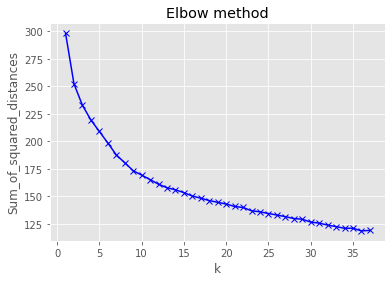

In [20]:
%matplotlib inline
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method')
plt.show()

In [21]:
# As shown in above graph, we can see that after the value of 'k' increases, 
# there's no significant decrease in the sum of squared distances value. 
# therefore we terminate it and set value of 'k' as 10. 

In [22]:
km10 = KMeans(n_clusters=10)
km10 = km10.fit(ds1)

In [23]:
print(km10.labels_)

[2 4 6 1 8 8 4 8 3 4 2 2 2 4 4 2 4 1 8 4 2 7 2 4 4 4 2 2 3 8 8 8 1 8 6 8 8
 1 1 1 8 4 8 4 4 8 4 2 7 4 8 1 6 3 8 8 1 6 6 6 8 7 2 4 4 8 7 7 7 2 4 6 4 4
 7 1 4 9 4 8 6 1 4 2 2 8 2 4 1 8 1 1 1 1 8 4 2 4 1 1 3 8 4 4 8 3 8 4 2 4 4
 4 8 8 1 1 6 8 2 9 2 2 7 7 7 2 4 9 9 7 7 9 8 1 4 2 1 3 1 8 2 4 8 7 0 8 1 6
 3 3 4 8 8 8 6 8 4 2 8 1 1 6 8 1 6 6 6 3 3 1 1 6 1 3 8 6 2 2 4 8 8 8 2 8 1
 1 4 5 9 9 2 2 7 8 4 0 7 7 4 2 6 5 0 9 4 2 7 2 2 7 2 1 8 6 4 8 1 1 3 6 1 4
 4 1 4 2 3 6 3 3 6 1 3 3 6 6 6 1 8 1 8 8 8 3 3 1 1 6 3 2 2 4 2 2 2 2 7 4 7
 7 2 3 3 1 7 7 4 3 3 3 2 7 6 3 3 7 9 8 1 4 7 7 7 2 4 1 9 9 7 7 7 2 7 0 4 4
 2 7 7 7 3 6 4 4 7 2 2 8 8 1 8 6 6 3 6 3 6 1 6 7 7 2 4 1 6 8 6 1 1 8 1 1 3
 6 6 1 6 1 1 8 8 3 8 3 3 6 6 3 6 4 1 1 1 4 8 1 4 2 3 2 7 7 2 8 3 1 1 8 1 8
 3 6 6 6 1 7 2 8 8 6 1 0 0 7 0 7 1 6 6 6 6 7 4 4 8 8 8 2 4 1 1 1 1 1 1 1 2
 3 6 1 1 4 3 6 6 6 1 1 8 6 8 1 1 8 4 3 1 6 1 1 6 6 3 1 6 1 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 6 6 6 1 1 1 6 6 6 6 1 6 1 6 1 8 6 6 1 1 1 6 3 6 1 1 6
 1 6 3 1 6 1 1 2 1 6 6 1 

In [24]:
print(km10.labels_)
result = km10.labels_
result = pd.DataFrame(result, columns = ['cluster'])
result.groupby('cluster').size()

[2 4 6 1 8 8 4 8 3 4 2 2 2 4 4 2 4 1 8 4 2 7 2 4 4 4 2 2 3 8 8 8 1 8 6 8 8
 1 1 1 8 4 8 4 4 8 4 2 7 4 8 1 6 3 8 8 1 6 6 6 8 7 2 4 4 8 7 7 7 2 4 6 4 4
 7 1 4 9 4 8 6 1 4 2 2 8 2 4 1 8 1 1 1 1 8 4 2 4 1 1 3 8 4 4 8 3 8 4 2 4 4
 4 8 8 1 1 6 8 2 9 2 2 7 7 7 2 4 9 9 7 7 9 8 1 4 2 1 3 1 8 2 4 8 7 0 8 1 6
 3 3 4 8 8 8 6 8 4 2 8 1 1 6 8 1 6 6 6 3 3 1 1 6 1 3 8 6 2 2 4 8 8 8 2 8 1
 1 4 5 9 9 2 2 7 8 4 0 7 7 4 2 6 5 0 9 4 2 7 2 2 7 2 1 8 6 4 8 1 1 3 6 1 4
 4 1 4 2 3 6 3 3 6 1 3 3 6 6 6 1 8 1 8 8 8 3 3 1 1 6 3 2 2 4 2 2 2 2 7 4 7
 7 2 3 3 1 7 7 4 3 3 3 2 7 6 3 3 7 9 8 1 4 7 7 7 2 4 1 9 9 7 7 7 2 7 0 4 4
 2 7 7 7 3 6 4 4 7 2 2 8 8 1 8 6 6 3 6 3 6 1 6 7 7 2 4 1 6 8 6 1 1 8 1 1 3
 6 6 1 6 1 1 8 8 3 8 3 3 6 6 3 6 4 1 1 1 4 8 1 4 2 3 2 7 7 2 8 3 1 1 8 1 8
 3 6 6 6 1 7 2 8 8 6 1 0 0 7 0 7 1 6 6 6 6 7 4 4 8 8 8 2 4 1 1 1 1 1 1 1 2
 3 6 1 1 4 3 6 6 6 1 1 8 6 8 1 1 8 4 3 1 6 1 1 6 6 3 1 6 1 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 6 6 6 1 1 1 6 6 6 6 1 6 1 6 1 8 6 6 1 1 1 6 3 6 1 1 6
 1 6 3 1 6 1 1 2 1 6 6 1 

cluster
0      7
1    103
2     56
3     59
4     64
5      3
6     89
7     44
8     91
9     11
dtype: int64

In [25]:
# The above array represents the cluster to which a datasample belongs to.
# This output is exported to file: Output1.txt
# Note the output is during the time of my execution. If the code is executed from start, the output will change.

In [26]:
df1 = pd.DataFrame(ds1)
df1

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,188.71,407,166,66.3,4.5,2110,7.9,...,2000,39.08,58.8,95.5,83.44,70.0,89.01,79.4,87.3,99.6
1,39024,3.00,7.7,188.71,443,214,69.2,6.5,2660,7.7,...,2590,39.08,60.7,94.8,83.44,80.8,89.01,79.5,92.1,100
2,32229,5.00,7.6,188.71,528,186,69.9,3.4,1666,7.7,...,1888,39.08,58.2,95.6,83.44,52.9,89.01,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,39.08,62.7,95.6,83.44,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,39.08,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,39.08,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,39.08,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [27]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [28]:
kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

In [29]:
print("Centroid values")
print(centroids)
print(labels)

Centroid values
[[4.03056563e+04 2.29859375e+00 7.84843750e+00 1.85950625e+02
  4.12793437e+02 2.39187500e+02 5.98509375e+01 5.16546875e+00
  1.51431250e+03 7.83281250e+00 2.09250000e+02 2.82000000e+02
  5.91559375e+01 5.98796875e+00 1.53537500e+03 7.80000000e+00
  1.24953438e+02 2.82844375e+02 9.34878125e+01 7.14343750e+01
  3.97031250e-01 1.54568750e+03 7.69531250e+00 1.84834375e+01
  8.54309375e+01 2.20192188e+01 7.90164063e+01 1.59375000e-02
  1.53065625e+03 3.86606250e+01 5.99142188e+01 9.10132813e+01
  8.43821875e+01 6.95178125e+01 8.93804688e+01 7.86101563e+01
  8.88962500e+01 9.95575000e+01]
 [2.83820339e+04 1.60830508e+00 7.76949153e+00 2.05881356e+02
  4.12152542e+02 2.08847458e+02 6.72661017e+01 4.33830508e+00
  1.47432203e+03 7.78135593e+00 2.20938983e+02 2.38661017e+02
  6.57232203e+01 4.78169492e+00 1.50067797e+03 7.78305085e+00
  1.25514237e+02 2.82136949e+02 9.47966102e+01 7.73881356e+01
  4.63389831e-01 1.50781356e+03 7.72542373e+00 1.79142373e+01
  8.62110169e+01 2.18

In [30]:
print(x[:,:])
x.shape

[['44101' '1.50' 7.8 ... '79.4' '87.3' '99.6']
 ['39024' '3.00' 7.7 ... '79.5' '92.1' '100']
 ['32229' '5.00' 7.6 ... '75.8' '88.7' '98.5']
 ...
 ['32922' '0.30' 7.4 ... '77.1' '88.9' '99']
 ['32190' '0.30' 7.3 ... '87.0' '89.5' '99.8']
 ['30488' '0.21' 7.5 ... '81.7' '86.4' 99.08]]


(527, 38)

In [31]:
# We now try to plot this data in 3D
# NOTE: If you are unable to see the graph, please re-execute below code segment again. Feel free to interact with
# the graph in 3D!

<IPython.core.display.Javascript object>


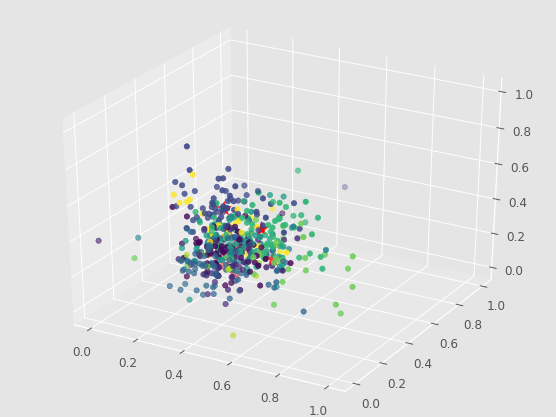

C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


In [32]:
%matplotlib notebook
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters = 10)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],
x[:,1],
x[:,2],
c = labels)

ax.scatter(centroids[:,0],
centroids[:,1],
centroids[:,2],
centroids[:,3],
marker = '*',c = 'r', s = 150)

In [33]:
dataframePCA = df1
df1

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.680598,0.041916,0.500000,0.387494,0.379070,0.035602,0.739554,0.115169,0.565723,0.500000,...,0.403122,0.490191,0.589207,0.951246,0.869827,0.719078,0.896770,0.762991,0.864198,0.993711
1,0.579121,0.086826,0.444444,0.387494,0.420930,0.060733,0.779944,0.171348,0.778984,0.333333,...,0.583716,0.490191,0.610132,0.943662,0.869827,0.832285,0.896770,0.764259,0.918070,1.000000
2,0.443305,0.146707,0.388889,0.387494,0.519767,0.046073,0.789694,0.084270,0.393563,0.333333,...,0.368840,0.490191,0.582599,0.952329,0.869827,0.539832,0.896770,0.717364,0.879910,0.976415
3,0.499151,0.101796,0.555556,0.427518,0.589535,0.049215,0.729805,0.115169,0.689802,0.416667,...,0.354148,0.414013,0.648678,0.949079,0.914451,0.743187,0.912145,0.799747,0.890011,1.000000
4,0.537147,0.041916,0.611111,0.518428,0.482558,0.040838,0.718663,0.101124,0.565723,0.500000,...,0.439853,0.490191,0.632159,0.952329,0.869827,0.729560,0.936693,0.747782,0.866442,0.992138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.453179,0.001796,0.444444,0.152334,0.198837,0.040838,0.607242,0.053371,0.094223,0.333333,...,0.079278,0.490191,0.627753,0.927411,0.712139,0.780922,0.775194,0.752852,0.968575,0.993711
523,0.469409,0.006587,0.500000,0.395577,0.308140,0.038743,0.771588,0.101124,0.130671,0.416667,...,0.081726,0.490191,0.583700,0.976165,0.864740,0.604822,0.923773,0.702155,0.902357,1.000000
524,0.457157,0.005988,0.277778,0.265356,0.332558,0.042932,0.713092,0.073034,0.158589,0.166667,...,0.138659,0.490191,0.657489,0.968581,0.786127,0.681342,0.806202,0.733840,0.882155,0.984277
525,0.442526,0.005988,0.222222,0.415233,0.539535,0.083770,0.722841,0.101124,0.236138,0.083333,...,0.196817,0.499363,0.667401,0.968581,0.849711,0.728512,0.903101,0.859316,0.888889,0.996855


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
x_std = StandardScaler().fit_transform(dataframePCA)
x_std

array([[ 1.05512506e+00, -3.13637480e-01, -4.08915804e-02, ...,
         1.78119090e-01, -2.04063046e-01,  1.19007534e-01],
       [ 2.75879654e-01,  2.33996712e-01, -4.47492767e-01, ...,
         1.89657257e-01,  3.84814047e-01,  2.11606044e-01],
       [-7.67053678e-01,  9.64175635e-01, -8.54093953e-01, ...,
        -2.37254934e-01, -3.23072276e-02, -1.35638367e-01],
       ...,
       [-6.60688292e-01, -7.51744833e-01, -1.66729633e+00, ...,
        -8.72587587e-02, -7.77068207e-03, -1.98902301e-02],
       [-7.73039609e-01, -7.51744833e-01, -2.07389751e+00, ...,
         1.05501981e+00,  6.58389546e-02,  1.65306789e-01],
       [-1.03427177e+00, -7.84602885e-01, -1.26069514e+00, ...,
         4.43496938e-01, -3.14477501e-01, -1.37052823e-03]])

In [35]:
features = x_std.T
cv_matrix = np.cov(features)
print(len(cv_matrix))
print(cv_matrix)

38
[[ 1.00190114e+00  3.62196765e-02  1.38065827e-01 ... -1.72098336e-01
  -2.03454469e-02  9.25585419e-04]
 [ 3.62196765e-02  1.00190114e+00 -1.04224539e-02 ...  3.76104554e-02
   1.14191284e-01  2.68760210e-02]
 [ 1.38065827e-01 -1.04224539e-02  1.00190114e+00 ...  1.41632040e-01
   6.19196207e-02  3.71650390e-02]
 ...
 [-1.72098336e-01  3.76104554e-02  1.41632040e-01 ...  1.00190114e+00
   5.55492858e-01  2.57259728e-01]
 [-2.03454469e-02  1.14191284e-01  6.19196207e-02 ...  5.55492858e-01
   1.00190114e+00  5.49378072e-01]
 [ 9.25585419e-04  2.68760210e-02  3.71650390e-02 ...  2.57259728e-01
   5.49378072e-01  1.00190114e+00]]


In [36]:
e_val, e_vec = np.linalg.eig(cv_matrix)
print(len(e_vec))
print('Eigen_vectors \n%s'%e_vec)

38
Eigen_vectors 
[[-0.09801854 -0.02229834 -0.00867792 ... -0.0064753   0.0054655
  -0.00123239]
 [ 0.03406867 -0.02061709 -0.04054928 ... -0.00356037  0.02564568
   0.01049422]
 [ 0.20769178 -0.02459966  0.09967321 ... -0.03930612 -0.02444405
   0.02839123]
 ...
 [ 0.11612288 -0.26686083  0.02256223 ... -0.28927569  0.35543471
  -0.06057076]
 [ 0.05593748 -0.3466019  -0.03124084 ... -0.22956945 -0.17586746
  -0.15761645]
 [ 0.04284001 -0.28334387  0.0781672  ... -0.27231901  0.18998591
   0.03351537]]


In [37]:
print(len(e_val))
print('Eigen_values \n%s'%e_val)

38
Eigen_values 
[6.69205868 5.92972937 4.74598021 2.84856323 2.88522754 2.13767093
 1.5919781  1.57225956 1.2332151  0.98910813 0.88418269 0.83737636
 0.65426968 0.63532602 0.57850843 0.54226341 0.50398669 0.42606577
 0.38912255 0.27866623 0.27560356 0.20948345 0.18020207 0.15619542
 0.12544023 0.11610257 0.10525003 0.09411619 0.08803169 0.07606972
 0.06773206 0.01426078 0.02334608 0.02531985 0.04867366 0.04006754
 0.03480297 0.0359868 ]


In [38]:
pca = PCA()
pca.fit(dataframePCA)
pca_data = pca.transform(dataframePCA)
pca_data

array([[-0.25591835,  0.0754925 ,  0.01414362, ...,  0.00654444,
         0.00305025, -0.00212234],
       [-0.56550594,  0.11871342,  0.40407193, ..., -0.0020505 ,
         0.01286745, -0.00115865],
       [-0.08092983, -0.0893587 ,  0.28947332, ...,  0.00480675,
         0.00707606, -0.00114823],
       ...,
       [ 0.40158021, -0.25638424,  0.23800505, ...,  0.00135445,
         0.00745562,  0.00527188],
       [ 0.29398628, -0.07795429,  0.38808306, ..., -0.00769062,
        -0.01056494,  0.00218241],
       [ 0.45377696, -0.2442897 ,  0.28332498, ...,  0.00905877,
         0.01284519, -0.0061747 ]])

In [39]:
pca_df = pd.DataFrame(pca_data)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.255918,0.075492,0.014144,0.274412,-0.150130,0.043187,-0.086042,0.057146,-0.081603,0.096257,...,-0.004159,-0.009762,-0.005605,0.018916,0.001290,0.009499,-0.002055,0.006544,0.003050,-0.002122
1,-0.565506,0.118713,0.404072,0.420365,-0.351061,-0.121939,-0.079193,-0.118506,-0.208472,0.194063,...,-0.007645,-0.016901,0.038796,-0.042769,-0.031128,0.009139,0.013455,-0.002051,0.012867,-0.001159
2,-0.080930,-0.089359,0.289473,0.076155,-0.110166,0.107455,-0.010242,-0.017431,0.047836,-0.100479,...,-0.007153,-0.009759,0.033242,0.017383,-0.016918,0.019172,-0.011818,0.004807,0.007076,-0.001148
3,-0.520532,0.090071,0.237342,0.191004,-0.199508,-0.067877,0.093656,-0.086433,-0.131548,0.049154,...,-0.025452,-0.014904,0.027712,0.047059,-0.044837,0.008939,-0.001195,-0.012381,0.006244,-0.012546
4,-0.351180,0.213478,0.109453,0.236008,-0.066704,0.011851,-0.038105,0.157727,0.158103,0.051108,...,0.003410,-0.001635,0.021756,-0.005740,-0.044082,-0.013185,-0.009836,0.011509,0.010412,-0.002108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.525899,-0.329457,-0.134681,-0.077537,-0.169020,0.072678,0.135025,-0.274537,-0.061578,0.078653,...,0.018543,0.001042,0.024802,0.012153,0.002975,-0.006447,0.005356,-0.014967,0.008691,0.004574
523,0.246716,-0.252296,-0.033621,-0.216520,-0.046019,0.156716,0.065981,-0.009330,-0.024368,-0.103437,...,0.006512,-0.004504,0.000292,-0.006871,0.002795,-0.011450,0.007996,-0.002074,0.002214,-0.002343
524,0.401580,-0.256384,0.238005,-0.099473,-0.155888,0.067412,0.111726,-0.055970,0.019394,0.046711,...,0.006605,-0.001423,0.025729,-0.000883,0.002639,-0.006070,0.004438,0.001354,0.007456,0.005272
525,0.293986,-0.077954,0.388083,-0.177269,-0.241957,-0.064173,0.027482,0.076397,0.186907,0.051779,...,0.002027,-0.000532,0.005804,0.003838,-0.018994,-0.013820,0.010526,-0.007691,-0.010565,0.002182


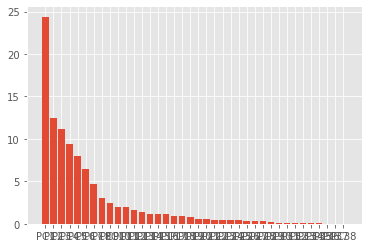

In [40]:
%matplotlib inline
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(var)+1)]

plt.bar(x=range(1,len(var)+1),height = var, tick_label = labels)
plt.show()

In [41]:
sum(e_val[0:10]) / sum(e_val)

0.8044125625698064

In [42]:
# this denotes that the first 10 dimensions retain about 80% of energy.
# We now apply modified k means to this reduced dataset

In [43]:
# We again use elbow method to determine value 'k'

In [44]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data)
    Sum_of_squared_distances.append(km.inertia_)

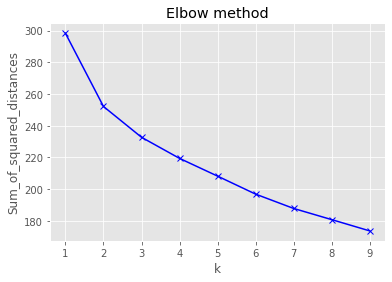

In [45]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method')
plt.show()

In [46]:
# Since there is no significant decrease in value of the sum of squarred error
# as 'k' value increases over 3, we take value of 'k' as 3.

In [47]:
# Applying K means with k = 3 to the reduced dataset.

In [48]:
km3 = KMeans(n_clusters=3)
km3 = km3.fit(pca_data)
print(km3.labels_)

[0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 2 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 2 0 0
 1 1 1 2 2 0 1 1 2 2 2 2 2 2 2 0 1 1 0 1 1 1 2 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 1 0 0 1 2 2 2 1 2 2 2 1 2 1 2 2 1 0 1 1 2 0 1 1 1 1 0 1 1 2 1 2 1 0 0
 1 1 0 2 0 1 1 1 2 2 1 1 1 1 0 2 0 0 0 1 1 1 2 1 2 2 0 1 2 1 1 1 2 2 2 2 0
 0 2 2 2 2 1 1 1 1 0 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 2
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 2 2 0 0 0 0 2 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 2 2 1 0 2 2 2 0 2 0 0 1 2 2 2 0
 0 1 0 2 2 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 2 1 1 0 0 2 2 2 2 2 0 0 0 1 1 2 1 0 1 2 1 1 2 2 0 2 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 2 1 0 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 2 2 1 1 2 0 1 1 1 

In [49]:
print(km3.labels_)
result = km3.labels_
result = pd.DataFrame(result, columns = ['cluster'])
result.groupby('cluster').size()

[0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 2 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 2 0 0
 1 1 1 2 2 0 1 1 2 2 2 2 2 2 2 0 1 1 0 1 1 1 2 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 1 0 0 1 2 2 2 1 2 2 2 1 2 1 2 2 1 0 1 1 2 0 1 1 1 1 0 1 1 2 1 2 1 0 0
 1 1 0 2 0 1 1 1 2 2 1 1 1 1 0 2 0 0 0 1 1 1 2 1 2 2 0 1 2 1 1 1 2 2 2 2 0
 0 2 2 2 2 1 1 1 1 0 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 2
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 2 2 0 0 0 0 2 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 2 2 1 0 2 2 2 0 2 0 0 1 2 2 2 0
 0 1 0 2 2 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 2 1 1 0 0 2 2 2 2 2 0 0 0 1 1 2 1 0 1 2 1 1 2 2 0 2 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 2 1 0 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 2 2 1 1 2 0 1 1 1 

cluster
0    195
1    232
2    100
dtype: int64

In [50]:
centroids = km3.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.371365,0.029340,-0.070270,-0.012910,0.009465,0.016542,-0.002967,-0.008077,-0.003424,0.005199,...,-0.000542,-0.000702,-0.000700,0.000621,-0.001002,0.000003,0.000710,-0.000371,-0.000145,-0.000282
1,0.129855,-0.126267,0.120555,0.012694,-0.035827,-0.012140,-0.000198,0.004340,0.008575,-0.005286,...,-0.000058,0.001141,0.001214,0.000141,0.000591,-0.000894,-0.000212,0.000605,0.000041,0.000112
2,0.422898,0.235727,-0.142661,-0.004275,0.064662,-0.004093,0.006245,0.005681,-0.013217,0.002124,...,0.001191,-0.001279,-0.001452,-0.001539,0.000584,0.002069,-0.000893,-0.000681,0.000187,0.000291


In [51]:
# We now plot this on a 3D graph. 
# NOTE: If the graph shows some irregularity, rerun the cell agian. Feel Free to interact with 3D graph!

<IPython.core.display.Javascript object>


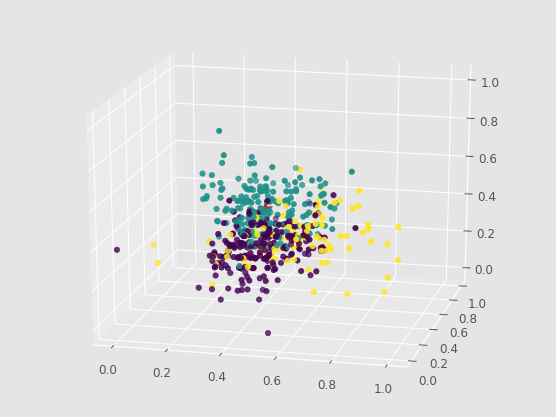

C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


In [52]:
%matplotlib notebook
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],
x[:,1],
x[:,2],
c = labels)

ax.scatter(centroids[:,0],
centroids[:,1],
centroids[:,2],
centroids[:,3],
marker = '*',c = 'r', s = 150)

In [53]:
# We can see that with value of k = 3, there are 3 distinct clusters formed.

In [54]:
# Implementing AutoEncoder.

In [58]:
from pandas import read_csv, DataFrame
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
 
df = ds2
Y = df[:]
X = df[:]
# SCALE EACH FEATURE INTO [0, 1] RANGE
sX = minmax_scale(X, axis = 0)
ncol = sX.shape[1]
X_train, X_test, Y_train, Y_test = train_test_split(sX, Y, train_size = 0.95, random_state = seed(2017))
 
### AN EXAMPLE OF SIMPLE AUTOENCODER ###
# InputLayer (None, 10)
#      Dense (None, 5)
#      Dense (None, 10)
 
input_dim = Input(shape = (ncol, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 10
# DEFINE THE ENCODER LAYER
encoded = Dense(encoding_dim, activation = 'relu')(input_dim)
# DEFINE THE DECODER LAYER
decoded = Dense(ncol, activation = 'sigmoid')(encoded)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input = input_dim, output = decoded)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, nb_epoch = 50, batch_size = 50, shuffle = True, validation_data = (X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input = input_dim, output = encoded)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[:]

ModuleNotFoundError: No module named 'tensorlow'

In [ ]:
encoded_df = pd.DataFrame(encoded_out)
encoded_df

In [ ]:
print(encoded_out[:,:])
encoded_out.shape

In [56]:
# We plot this reduced dataset.

In [57]:
%matplotlib notebook
x1 = encoded_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x1_scaled = min_max_scaler.fit_transform(x1)
df2 = pd.DataFrame(x1_scaled)

kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(x1)
labels = kmeans.predict(x1)
centroids = kmeans.cluster_centers_



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1[:,0],
x1[:,1],
x1[:,2],
c = labels)

ax.scatter(centroids[:,0],
centroids[:,1],
centroids[:,2],
marker = '*',c = 'r', s = 150)

NameError: name 'encoded_df' is not defined

In [ ]:
# We can see that after the Autoencoder is applied, the clusters can be distinguished very clearly, as there are less
# datasamples.

In [ ]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint
from sklearn import decomposition

In [ ]:
# Implementing PCA as a Single layer Encoder.

In [ ]:
# Fit Autoencoder
nb_epoch = 100
batch_size = 16
input_dim = pca_data.shape[1] #num of predictor variables, 
encoding_dim = 3
learning_rate = 1e-3
X_train, X_test= train_test_split(sX, train_size = 0.95, random_state = seed(2017))
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True) 
decoder = Dense(input_dim, activation="linear", use_bias = True)
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(X_train, X_train,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)# Fit PCA
pca = decomposition.PCA(n_components=10)
pca.fit(X_train_scaled)

In [ ]:
%matplotlib inline
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(var)+1)]

plt.bar(x=range(1,len(var)+1),height = var, tick_label = labels)
plt.show()

In [ ]:
# The graph shows the reduced dimensionality by implementing PCA as a single layer Encoder.